In [1]:
import pandas as pd 
import numpy  as np 



melakukan import pada dataset

In [2]:
df = pd.read_excel("Algoritma Apriori Chintya.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID transaksi    150 non-null    object 
 1   Mie Yamin Asin  150 non-null    float64
 2   Lumpia          150 non-null    float64
 3   Ocha            150 non-null    float64
 4   Black Sun       150 non-null    float64
 5   Ginger Tea      150 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


melakukan pengecekan data yang hilang 

In [4]:
df.isnull().sum()
df.head()


,ID transaksi,Mie Yamin Asin,Lumpia,Ocha,Black Sun,Ginger Tea
0,NaN,NaN,NaN,NaN,NaN,NaN
1,T1,1.0,1.0,0.0,0.0,0.0
2,T2,1.0,0.0,1.0,1.0,0.0
3,T3,1.0,1.0,0.0,0.0,1.0
4,T4,1.0,1.0,0.0,1.0,0.0


melakukan drop index 

In [5]:
df.dropna()


,ID transaksi,Mie Yamin Asin,Lumpia,Ocha,Black Sun,Ginger Tea
1,T1,1.0,1.0,0.0,0.0,0.0
2,T2,1.0,0.0,1.0,1.0,0.0
3,T3,1.0,1.0,0.0,0.0,1.0
4,T4,1.0,1.0,0.0,1.0,0.0
5,T5,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
146,T146,0.0,1.0,1.0,1.0,0.0
147,T147,1.0,1.0,0.0,0.0,1.0
148,T148,0.0,1.0,1.0,1.0,0.0
149,T149,1.0,1.0,0.0,1.0,0.0


mengelompokkan data berdasarkan kolom 'ID transaksi' dan menghitung total nilai untuk kolom-kolom tertentu, yaitu 'Mie Yamin Asin', 'Lumpia', 'Ocha', 'Black Sun', dan 'Ginger Tea'. Fungsi groupby mengelompokkan data ke dalam grup berdasarkan ID transaksi, sedangkan .sum() menjumlahkan nilai-nilai di dalam setiap grup untuk kolom yang dipilih. Hasilnya adalah DataFrame baru yang menampilkan total penjualan tiap item per transaksi. Alasan penggunaan kode ini adalah untuk menganalisis jumlah penjualan per transaksi secara efisien dan membantu memahami pola pembelian pelanggan.


In [6]:
grouped_df = df.groupby('ID transaksi')[['Mie Yamin Asin', 'Lumpia', 'Ocha', 'Black Sun', 'Ginger Tea']].sum()

print(grouped_df)

              Mie Yamin Asin  Lumpia  Ocha  Black Sun  Ginger Tea
ID transaksi                                                     
T1                       1.0     1.0   0.0        0.0         0.0
T10                      1.0     1.0   1.0        0.0         0.0
T100                     1.0     1.0   0.0        0.0         1.0
T101                     1.0     0.0   1.0        1.0         0.0
T102                     0.0     1.0   0.0        0.0         1.0
...                      ...     ...   ...        ...         ...
T95                      1.0     1.0   1.0        1.0         0.0
T96                      1.0     0.0   1.0        0.0         1.0
T97                      1.0     1.0   0.0        0.0         0.0
T98                      0.0     1.0   1.0        1.0         0.0
T99                      1.0     0.0   1.0        0.0         1.0

[150 rows x 5 columns]


analisis dengan menerapkan market basket analysis untuk menemukan pola hubungan antar item. Fungsi apriori digunakan untuk menghitung frequent itemsets dari data grouped_df dengan nilai support minimal 0.2, yang menunjukkan kombinasi item yang sering muncul bersama dalam transaksi. Hasilnya ditampilkan dalam format tabel menggunakan library tabulate agar lebih mudah dibaca. Selanjutnya, fungsi association_rules menghitung aturan asosiasi dari frequent itemsets dengan menggunakan metrik confidence minimal 0.5, yang mengindikasikan seberapa besar kemungkinan suatu item dibeli bersamaan dengan item lain. Hasil aturan asosiasi juga ditampilkan dalam bentuk tabel. Analisis ini bermanfaat untuk memahami pola pembelian pelanggan, seperti produk yang sering dibeli bersama, yang dapat mendukung pengambilan keputusan bisnis, seperti promosi atau pengaturan produk.

In [7]:

from mlxtend.frequent_patterns import apriori, association_rules
from tabulate import tabulate

# Menghitung itemsets yang sering muncul
frequent_itemsets = apriori(grouped_df, min_support=0.2, use_colnames=True)

# Menampilkan hasil frequent itemsets dalam bentuk tabel
print("Frequent Itemsets:")
print(tabulate(frequent_itemsets, headers='keys', tablefmt='pretty', showindex=False))

# Menghitung aturan asosiasi
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print("\nAssociation Rules:")
print(tabulate(rules, headers='keys', tablefmt='pretty', showindex=False))

Frequent Itemsets:
+---------------------+-------------------------------------------------------+
|       support       |                       itemsets                        |
+---------------------+-------------------------------------------------------+
|        0.74         |             frozenset({'Mie Yamin Asin'})             |
|        0.58         |                 frozenset({'Lumpia'})                 |
| 0.4666666666666667  |                  frozenset({'Ocha'})                  |
| 0.5466666666666666  |               frozenset({'Black Sun'})                |
| 0.5666666666666667  |               frozenset({'Ginger Tea'})               |
| 0.44666666666666666 |        frozenset({'Mie Yamin Asin', 'Lumpia'})        |
| 0.32666666666666666 |         frozenset({'Ocha', 'Mie Yamin Asin'})         |
| 0.36666666666666664 |      frozenset({'Black Sun', 'Mie Yamin Asin'})       |
| 0.3933333333333333  |      frozenset({'Ginger Tea', 'Mie Yamin Asin'})      |
| 0.21333333333333335

C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [8]:


# Menghitung itemsets yang sering muncul
frequent_itemsets = apriori(grouped_df, min_support=0.2, use_colnames=True)

# Menghitung aturan asosiasi
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Memilih kolom yang diinginkan
selected_columns = rules[['antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence', 'lift']]

# Menampilkan hasil aturan asosiasi dengan styling
styled_rules = selected_columns.style.set_table_attributes('style="border-collapse: collapse; width: 100%;"') \
    .set_table_styles([{'selector': 'th', 'props': [('background-color', '#2196F3'), ('color', 'white'), ('border', '1px solid black')]},
                       {'selector': 'td', 'props': [('border', '1px solid black')]}]) \
    .set_properties(**{'padding': '10px', 'text-align': 'center'})

# Menampilkan hasil
styled_rules

C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,frozenset({'Mie Yamin Asin'}),frozenset({'Lumpia'}),0.740000,0.580000,0.446667,0.603604,1.040696
1,frozenset({'Lumpia'}),frozenset({'Mie Yamin Asin'}),0.580000,0.740000,0.446667,0.770115,1.040696
2,frozenset({'Ocha'}),frozenset({'Mie Yamin Asin'}),0.466667,0.740000,0.326667,0.700000,0.945946
3,frozenset({'Black Sun'}),frozenset({'Mie Yamin Asin'}),0.546667,0.740000,0.366667,0.670732,0.906394
4,frozenset({'Ginger Tea'}),frozenset({'Mie Yamin Asin'}),0.566667,0.740000,0.393333,0.694118,0.937997
5,frozenset({'Mie Yamin Asin'}),frozenset({'Ginger Tea'}),0.740000,0.566667,0.393333,0.531532,0.937997
6,frozenset({'Black Sun'}),frozenset({'Lumpia'}),0.546667,0.580000,0.306667,0.560976,0.967199
7,frozenset({'Lumpia'}),frozenset({'Black Sun'}),0.580000,0.546667,0.306667,0.528736,0.967199
8,frozenset({'Ginger Tea'}),frozenset({'Lumpia'}),0.566667,0.580000,0.306667,0.541176,0.933063
9,frozenset({'Lumpia'}),frozenset({'Ginger Tea'}),0.580000,0.566667,0.306667,0.528736,0.933063


 menganalisis association rules dan memvisualisasikan nilai support dari setiap aturan dalam bentuk grafik batang horizontal. Setelah menghitung frequent itemsets dan aturan asosiasi menggunakan fungsi apriori dan association_rules, nilai support dikonversi menjadi persentase untuk mempermudah interpretasi. Kolom baru rules_text dibuat untuk menampilkan aturan dalam format yang lebih mudah dibaca, seperti [antecedent] -> [consequent]. Grafik batang dibuat menggunakan seaborn untuk menunjukkan nilai support setiap aturan, dengan tambahan nilai persentase pada ujung setiap batang untuk memperjelas informasi. Alasan penggunaan kode ini adalah untuk memberikan representasi visual yang informatif dan memudahkan pemahaman tentang aturan asosiasi yang dihasilkan, sehingga mendukung pengambilan keputusan bisnis berbasis data.

C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\tegar\AppData\Local\Temp\ipykernel_2564\1349138816.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='rules_text', x='support', data=rules, palette='viridis')


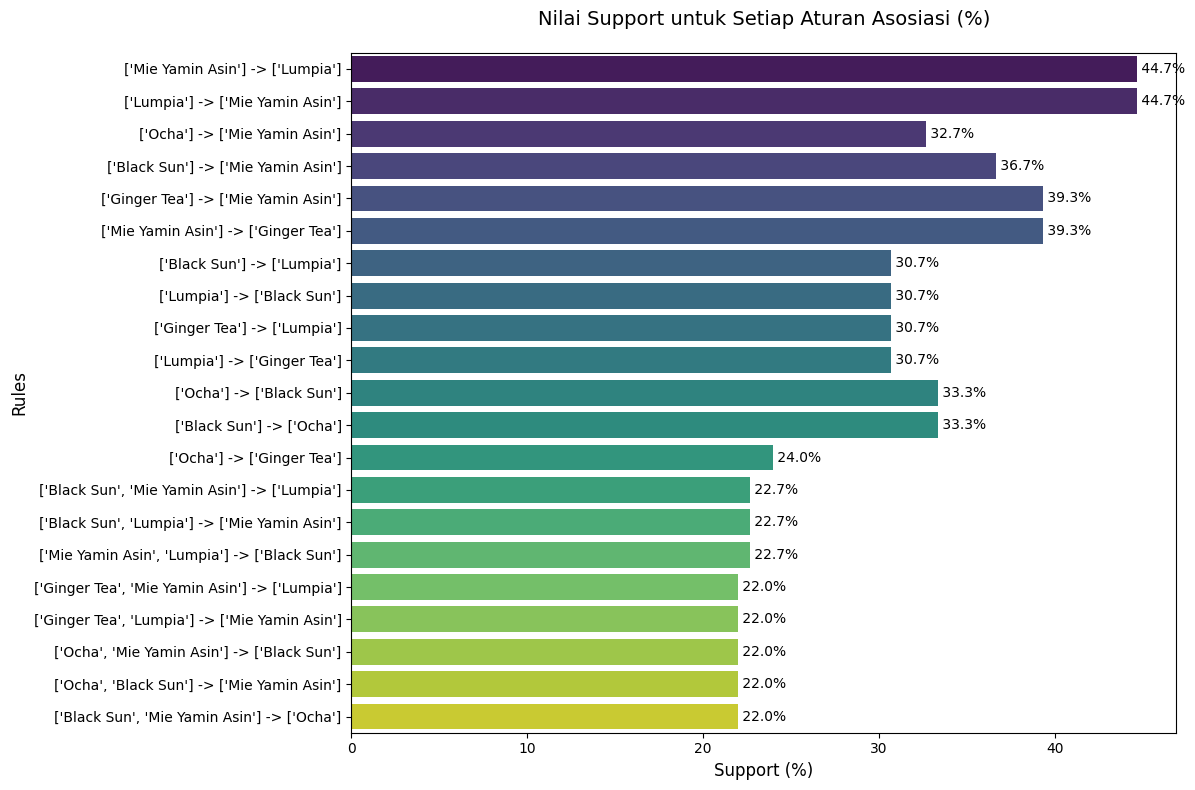

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung itemsets yang sering muncul
frequent_itemsets = apriori(grouped_df, min_support=0.2, use_colnames=True)

# Menghitung aturan asosiasi
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Mengubah nilai support menjadi persentase
rules['support'] = rules['support'] * 100

# Membuat kolom rules_text untuk label yang lebih mudah dibaca
rules['rules_text'] = rules.apply(lambda x: f"{list(x['antecedents'])} -> {list(x['consequents'])}", axis=1)

# Mengatur ukuran grafik
plt.figure(figsize=(12, 8))

# Membuat grafik batang horizontal
sns.barplot(y='rules_text', x='support', data=rules, palette='viridis')

# Menambahkan judul dan label
plt.title('Nilai Support untuk Setiap Aturan Asosiasi (%)', fontsize=14, pad=20)
plt.xlabel('Support (%)', fontsize=12)
plt.ylabel('Rules', fontsize=12)

# Menambahkan nilai support di ujung setiap batang
for i, v in enumerate(rules['support']):
    plt.text(v, i, f' {v:.1f}%', va='center', fontsize=10)

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan grafik
plt.show()